In [97]:
import math
import os
from glob import glob
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
matplotlib.style.use('ggplot')

<ipython-input-99-53de690d7da4>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(16,16))


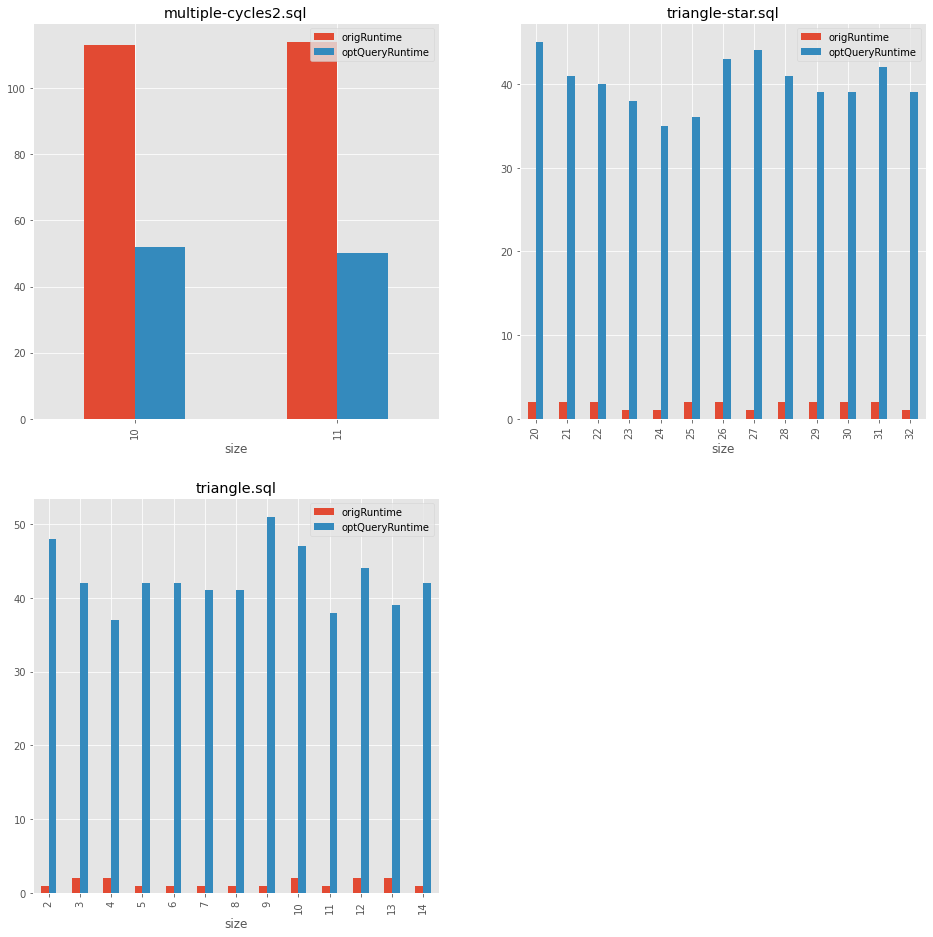

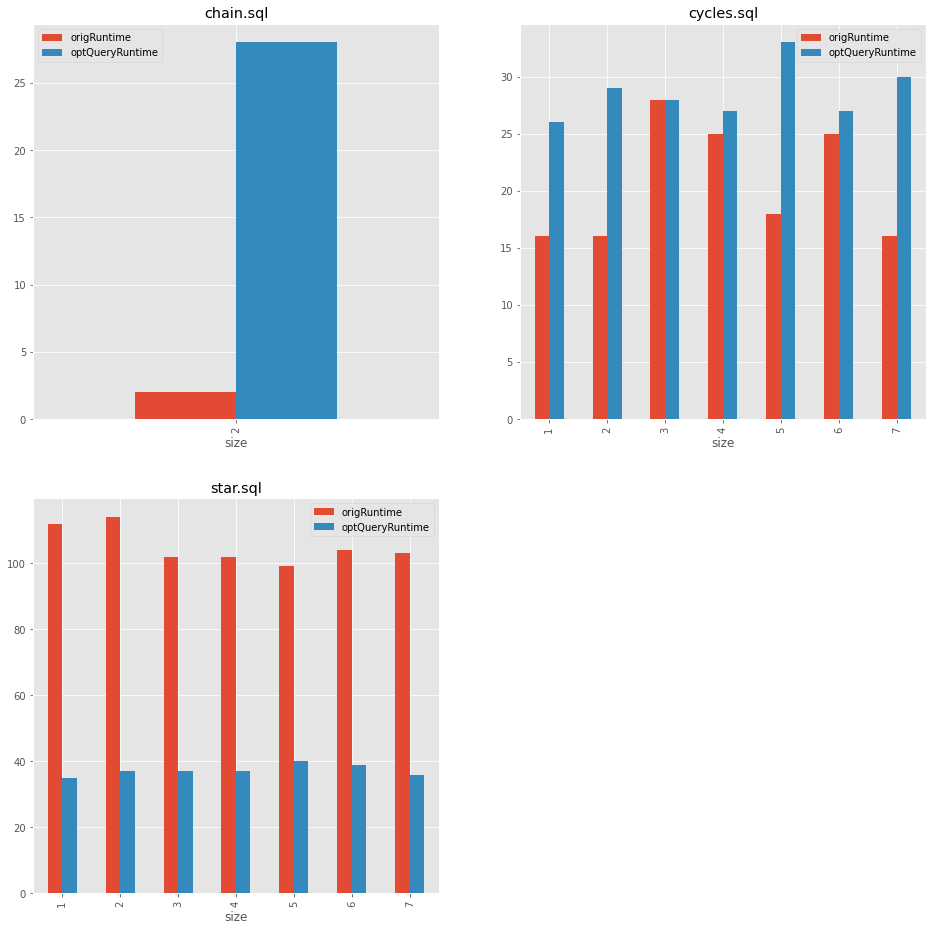

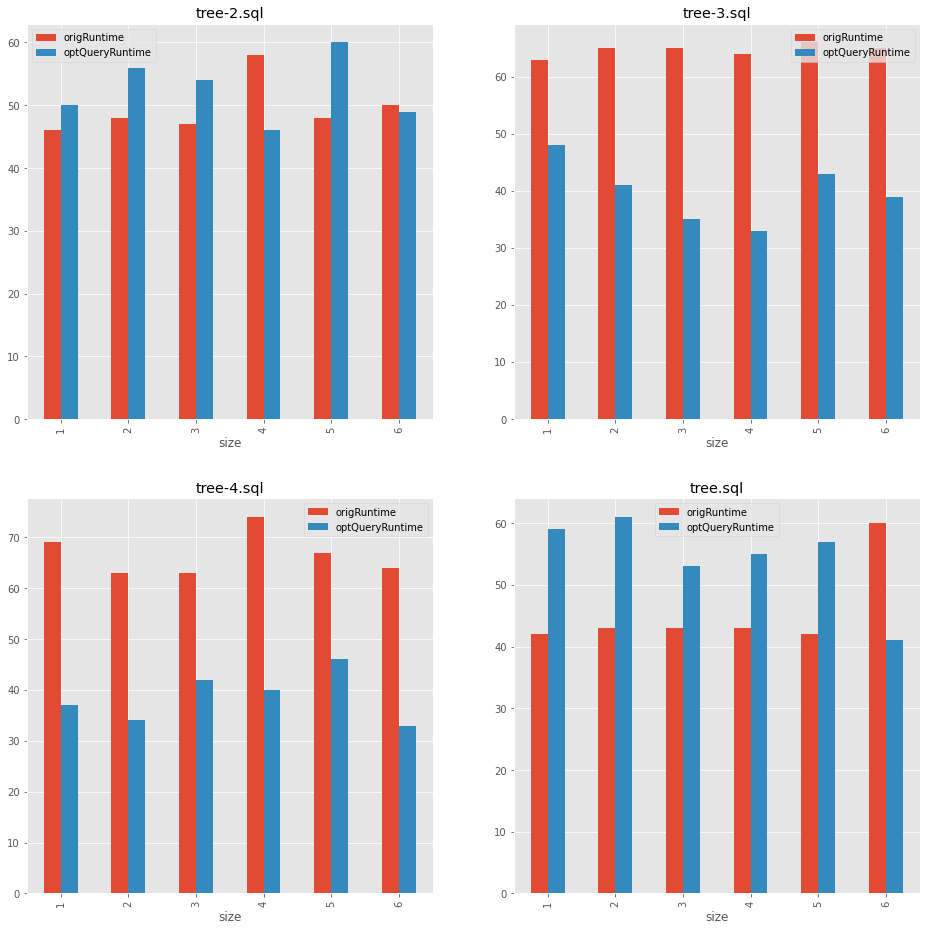

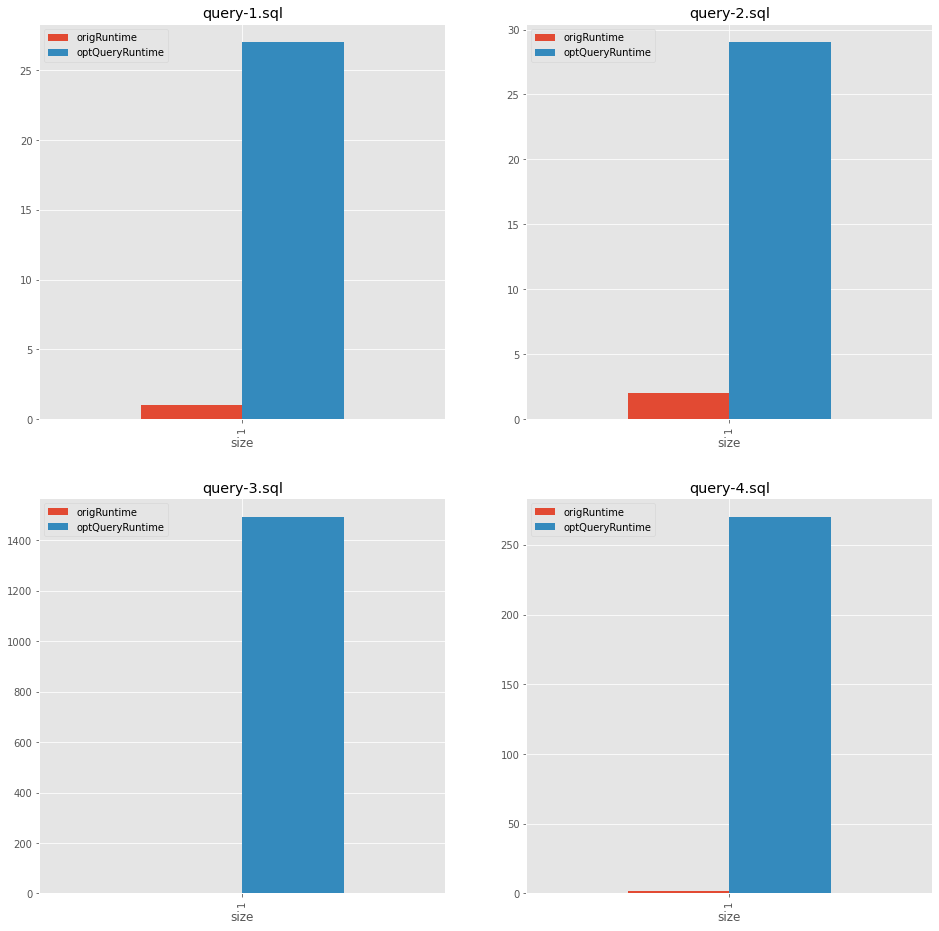

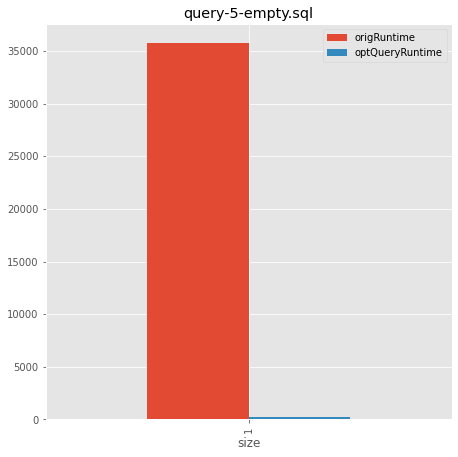

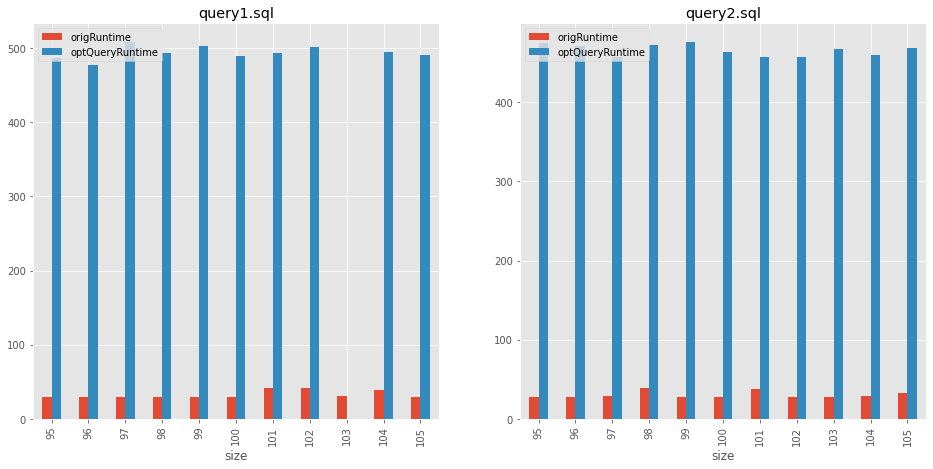

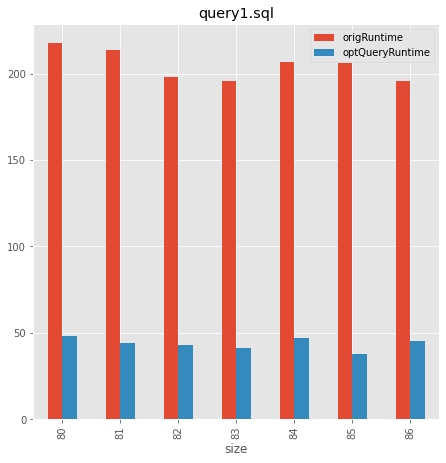

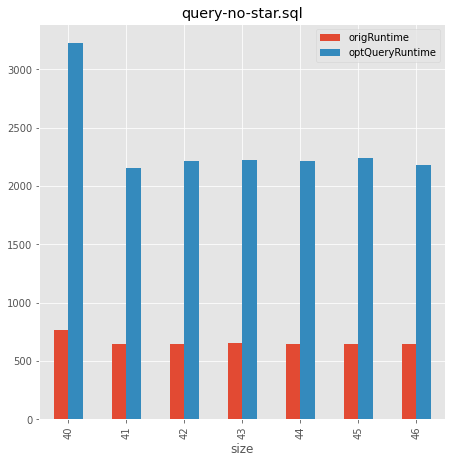

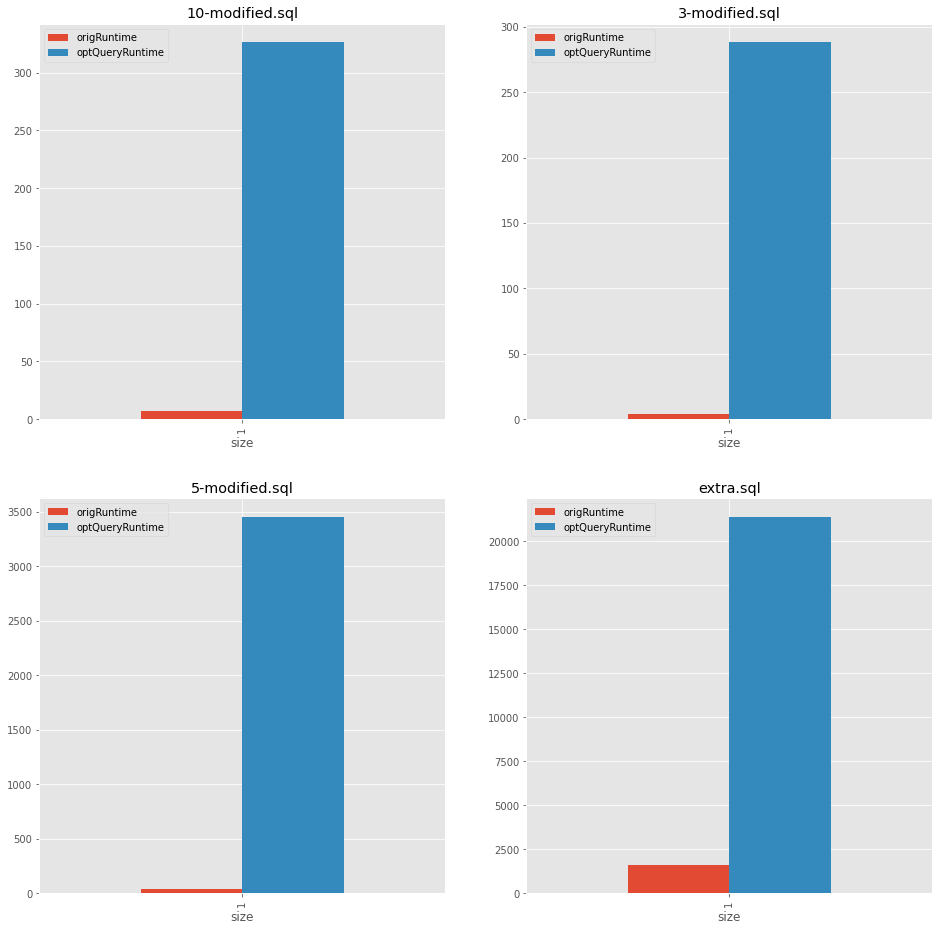

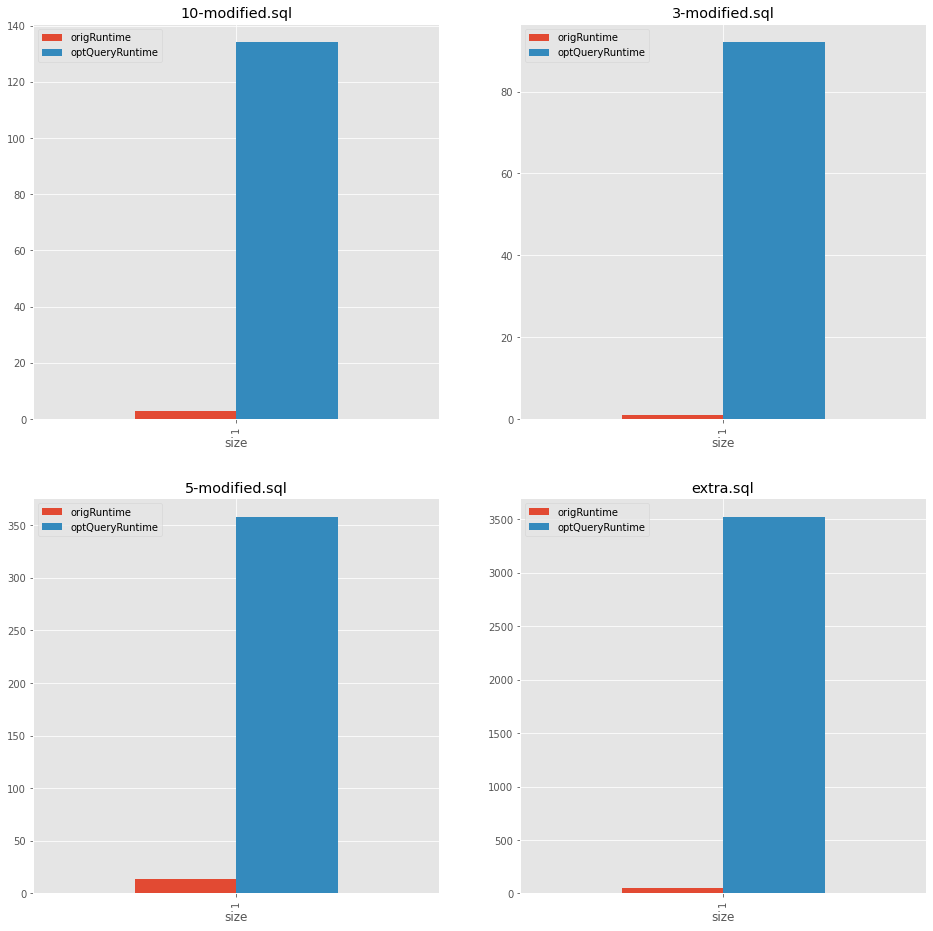

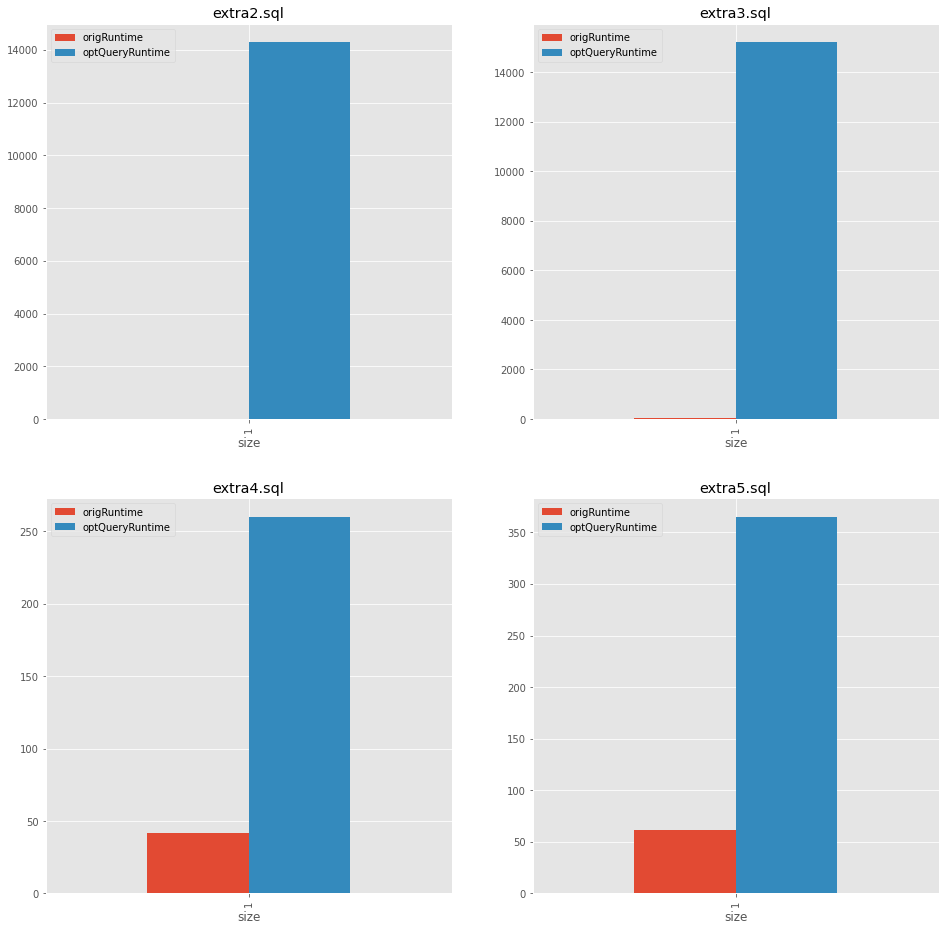

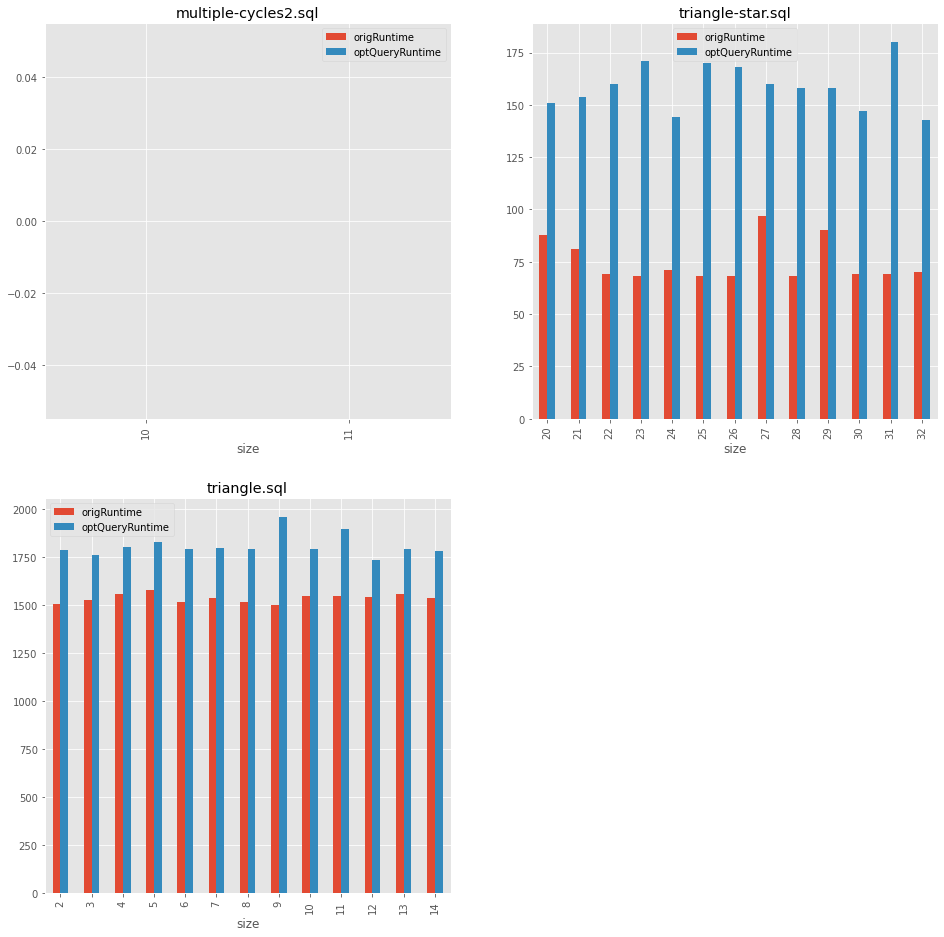

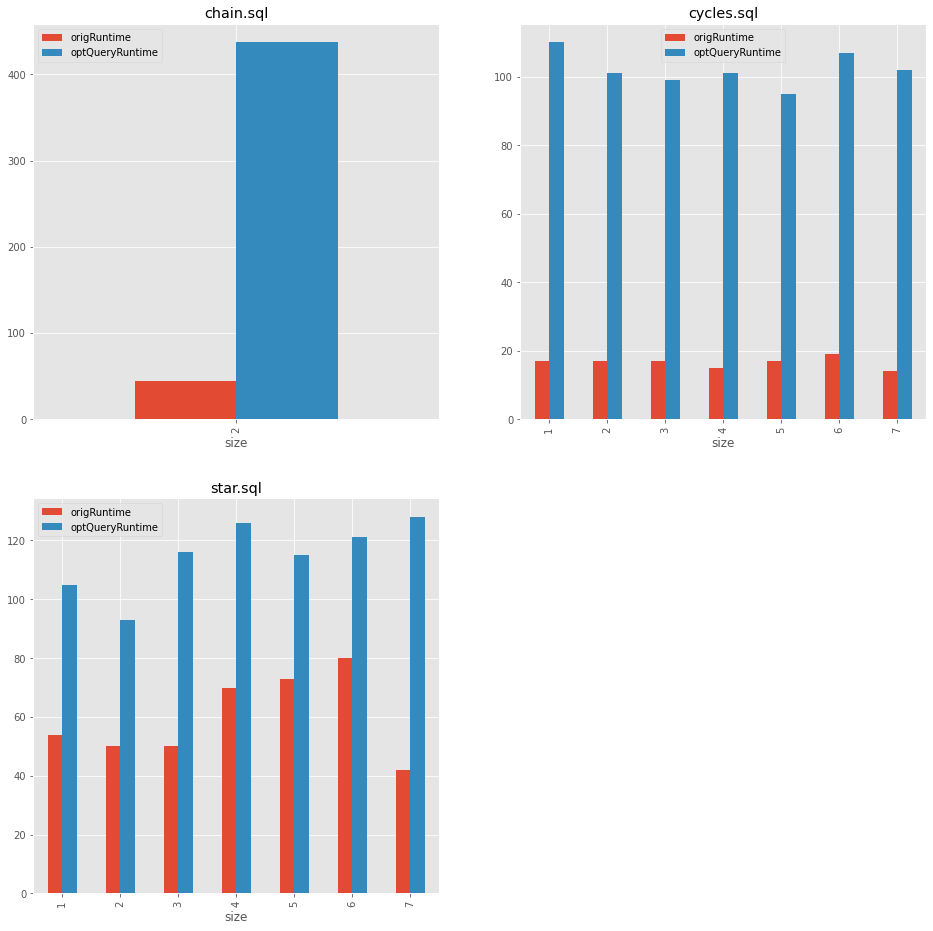

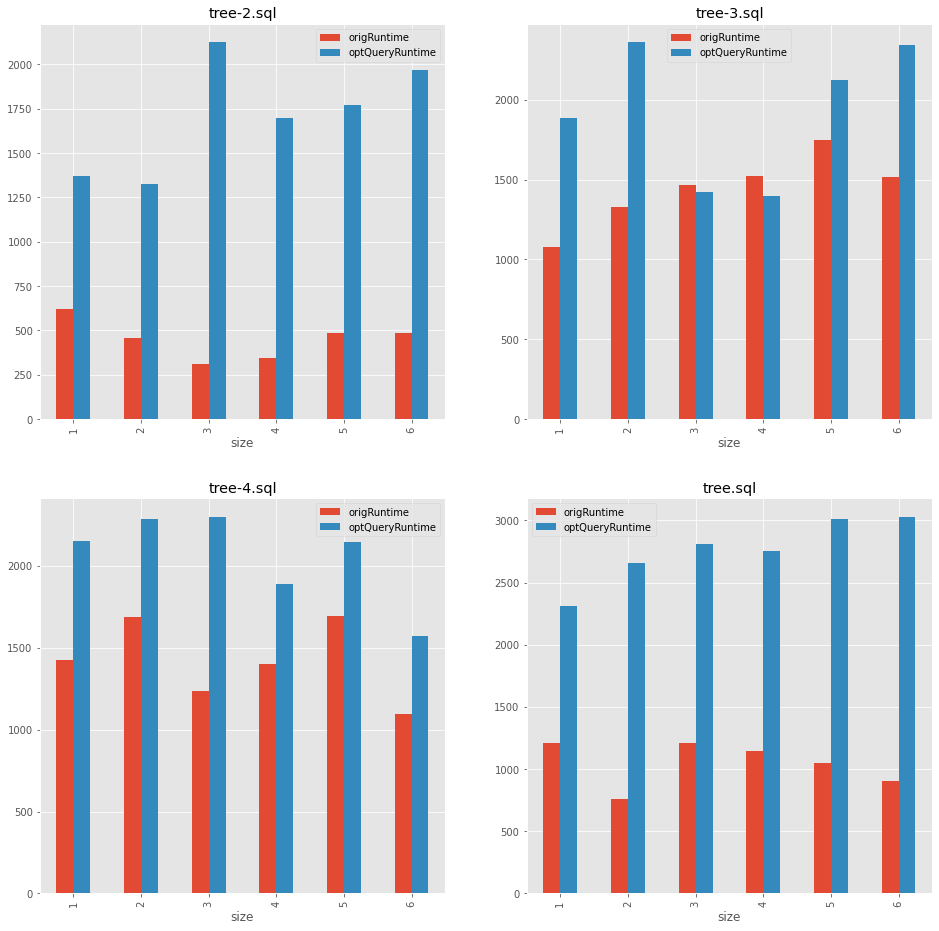

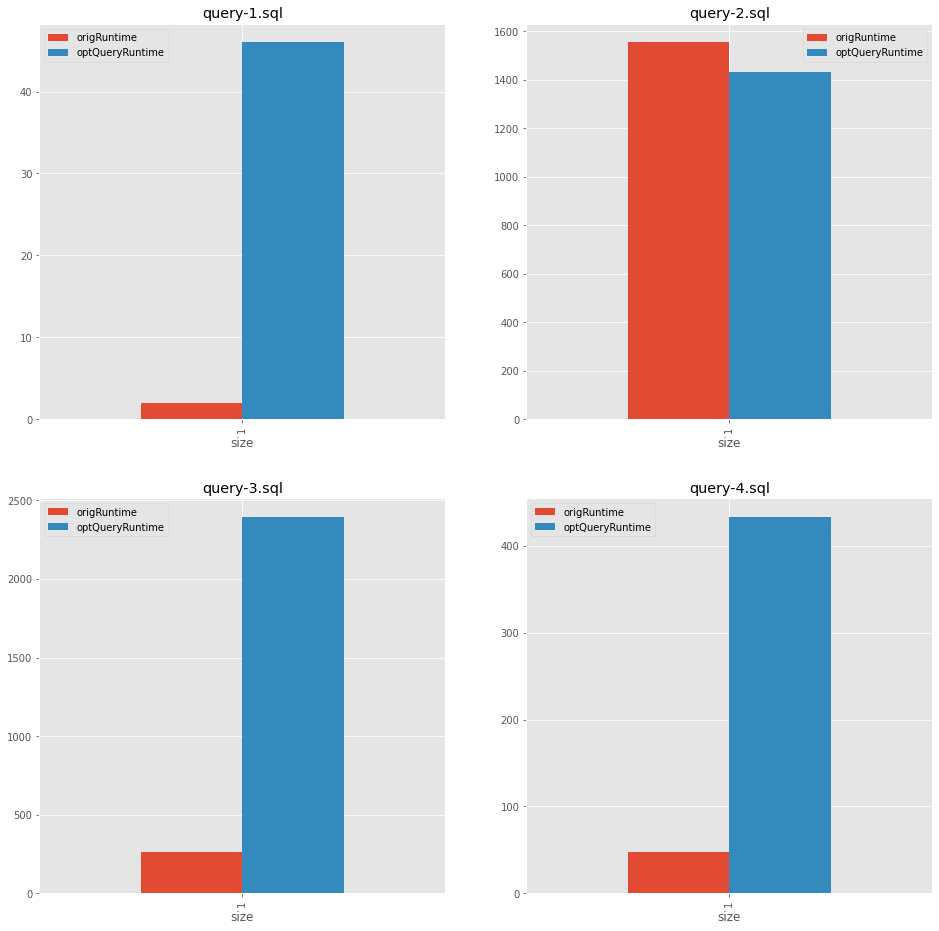

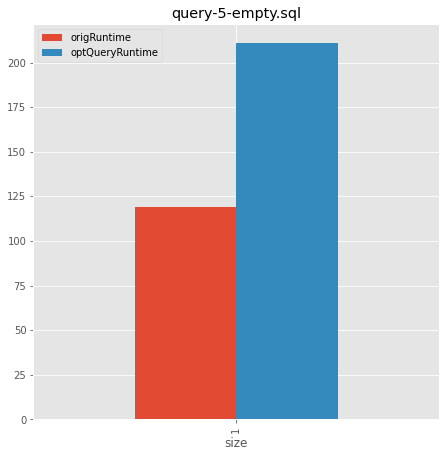

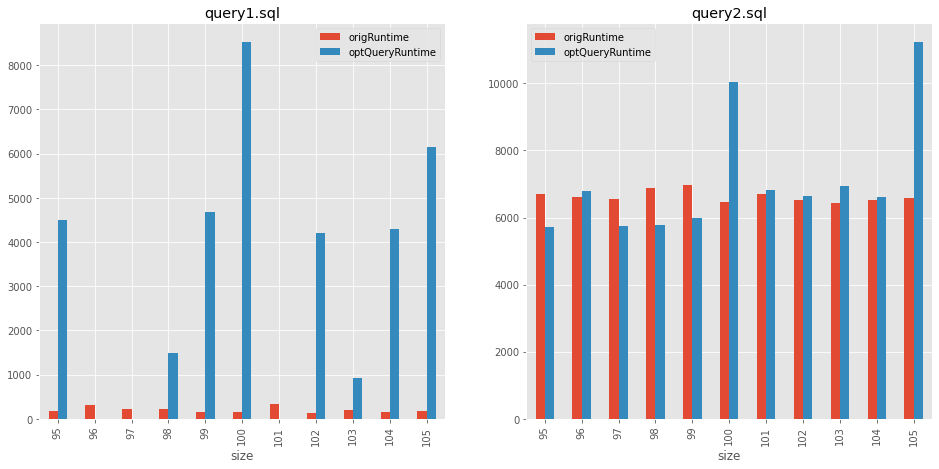

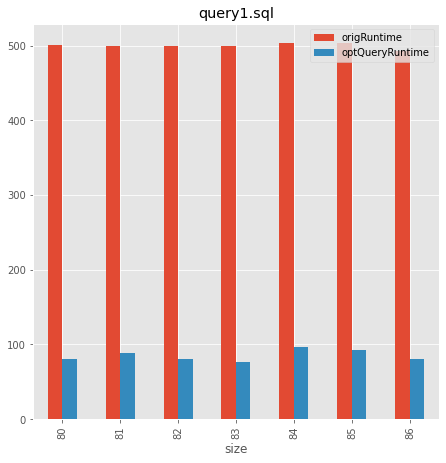

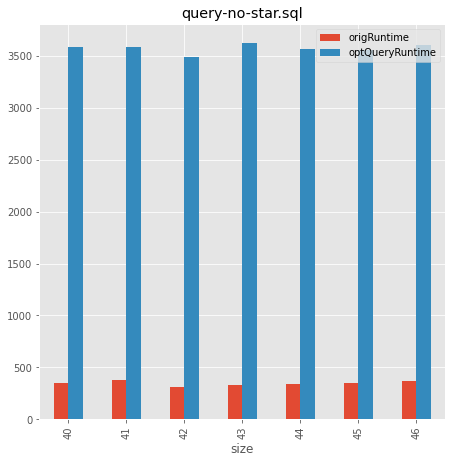

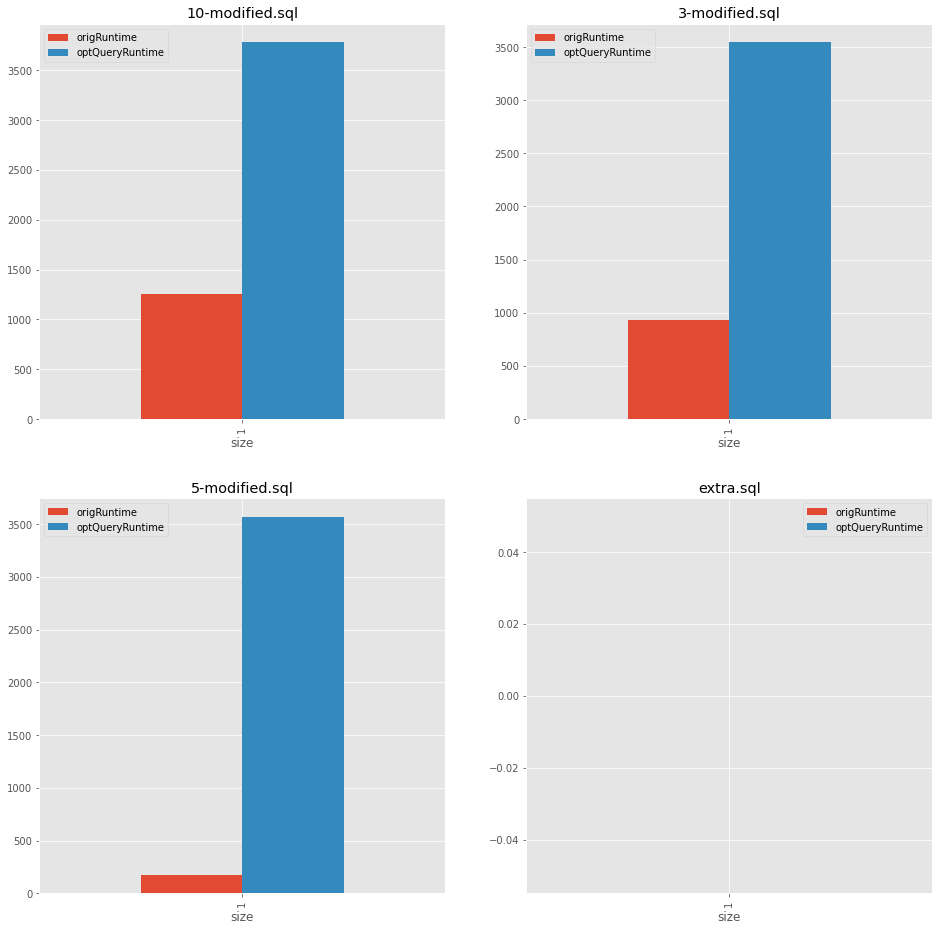

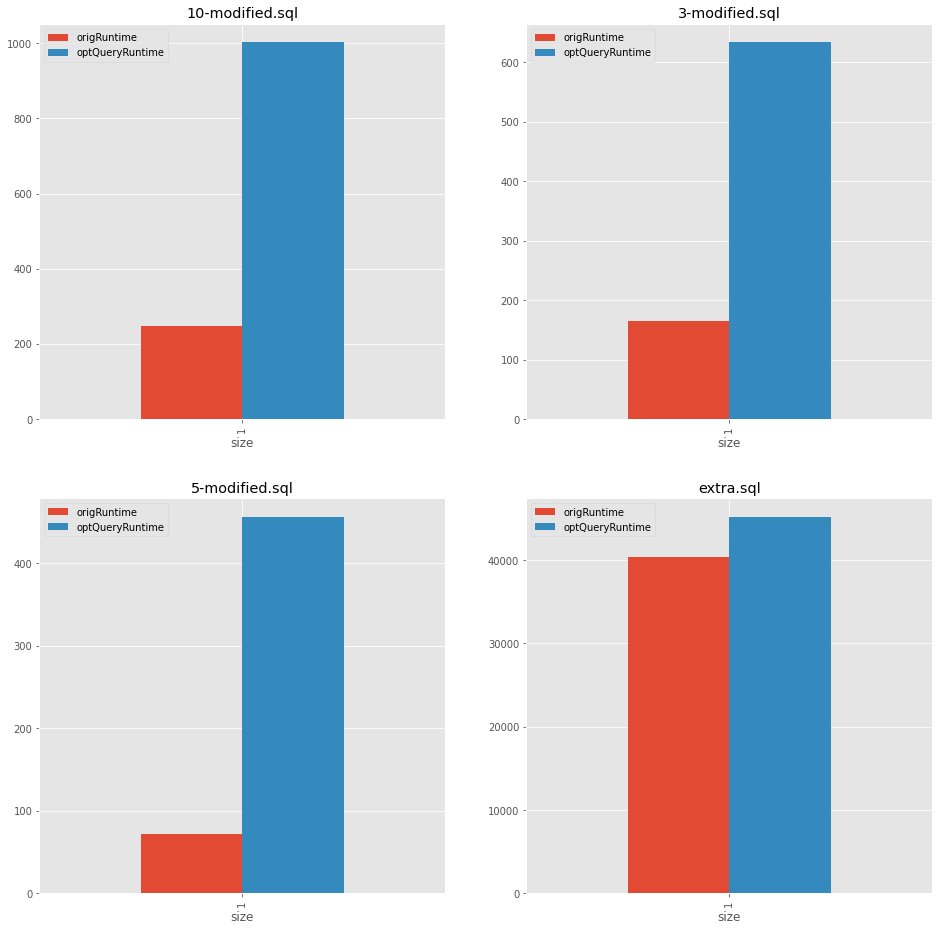

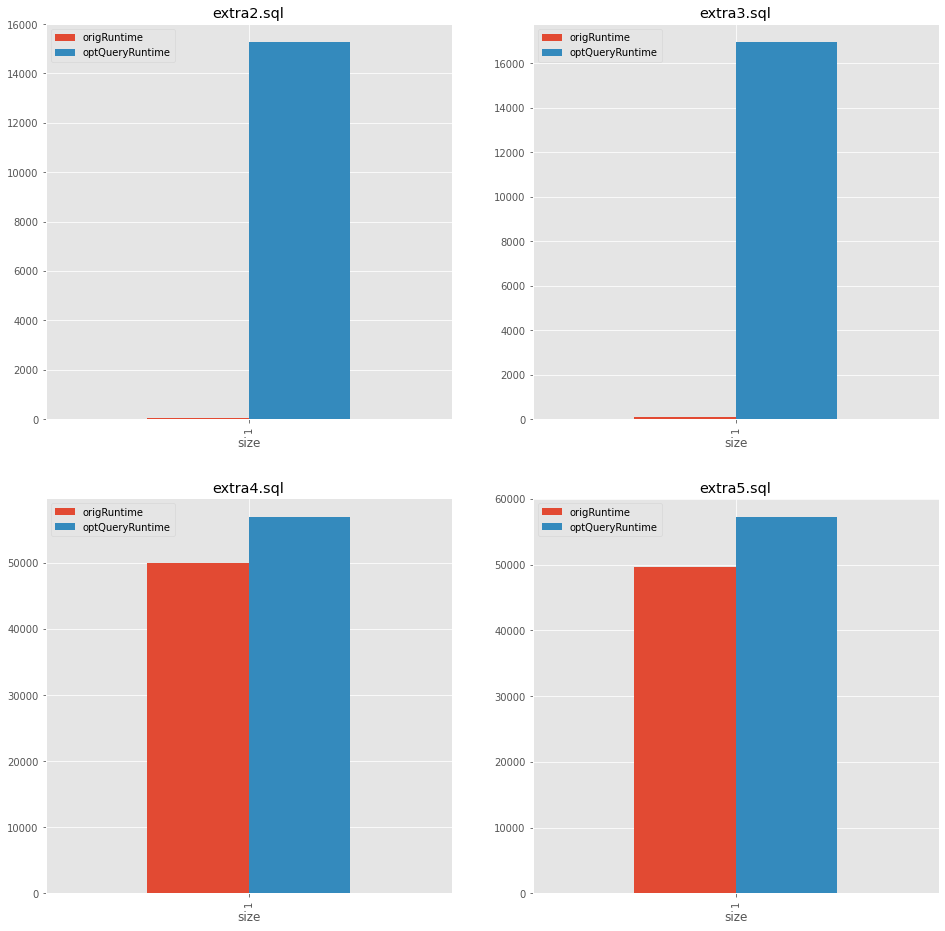

In [99]:
boolean_benchmark_path = 'benchmark-results-2021-02-06-21:46:46'
full_benchmark_path = "benchmark-results-2021-02-06-22:45:19"
function_benchmark_path = "benchmark-results-2021-02-07-00:32:09"

def visualize_db(db_name, db_df, prefix):
    fig = None
    #db_df.sort_values('query', inplace=True)
    for idx, (query_name, query_df) in enumerate(db_df.groupby('query')):
        if (idx % 4 == 0):
            fig = plt.figure(figsize=(16,16))
            #fig.suptitle(db_name, fontsize=16)
        query_df.sort_values('size', inplace=True)
        ax = fig.add_subplot(2,2,(idx % 4) + 1)
        ax.set_title(query_name)
        ax.xaxis.set_tick_params(rotation=90)
        query_df[['size', 'origRuntime', 'optQueryRuntime']].plot(kind='bar', x='size', ax=ax)
        plt.savefig('graphics/' + prefix + '_' + db_name + '_' + str(math.floor(idx / 4)) + '.pdf', bbox_inches='tight')


def visualize_summary(summary_file, prefix):
    df = pd.read_csv(summary_file)
    
    for db_name, db_df in df.groupby('db'):
        visualize_db(db_name, db_df, prefix)

def visualize(path, prefix):
    dbs = glob(path + '/*')
    summary_file = path + '/summary.csv'
    dbs.remove(summary_file)
    visualize_summary(summary_file, prefix)

os.makedirs('graphics', exist_ok=True)
visualize(boolean_benchmark_path, "boolean")
visualize(full_benchmark_path, "full")